## Name: Rishikesh Vadodaria
## Roll no: C114 

### Use descriptors to align images
#### Task 1: Use SIFT to determine interest points and descriptors for the given images
#### Task 2: Match key points of the images
#### Task 3: Generate Homography matrix using match key points
#### Task 4: Use Homography matrix to warp image to be aligned


###  Import libraries

In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [133]:
img1 = cv2.imread("car2.jpg")
img2 = cv2.imread("car1.jpg")

In [134]:
img1_g = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_g = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

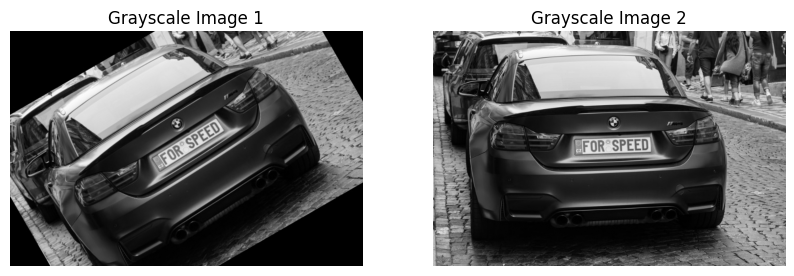

In [135]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1_g, cmap="gray")
plt.title("Grayscale Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_g, cmap="gray")
plt.title("Grayscale Image 2")
plt.axis("off")

plt.show()


In [136]:
orb = cv2.ORB_create(nfeatures=500)
k1, d1 = orb.detectAndCompute(img1_g, None)
k2, d2 = orb.detectAndCompute(img2_g, None)

In [137]:
ln = len(k1)
ln

500

In [138]:
len(d1[0])

32

In [139]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [140]:
matches = matcher.match(d1, d2)

In [141]:
if len(matches) == 0:
    print("No matches found!")
    exit()

In [142]:
matches = sorted(matches, key=lambda x: x.distance)
ln = min(len(matches), len(k1), len(k2))

In [143]:
kp1_locations = np.zeros((ln, 2))
kp2_locations = np.zeros((ln, 2))

In [144]:
for i in range(ln):
    kp1_locations[i, :] = k1[matches[i].queryIdx].pt
    kp2_locations[i, :] = k2[matches[i].trainIdx].pt


In [145]:
h,mask = cv2.findHomography(kp1_locations, kp2_locations, cv2.RANSAC, 5.0)

In [146]:
img_aligned = cv2.warpPerspective(img1, h, (img2.shape[1], img2.shape[0]))

In [147]:
img1_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_aligned_rgb = cv2.cvtColor(img_aligned, cv2.COLOR_BGR2RGB)

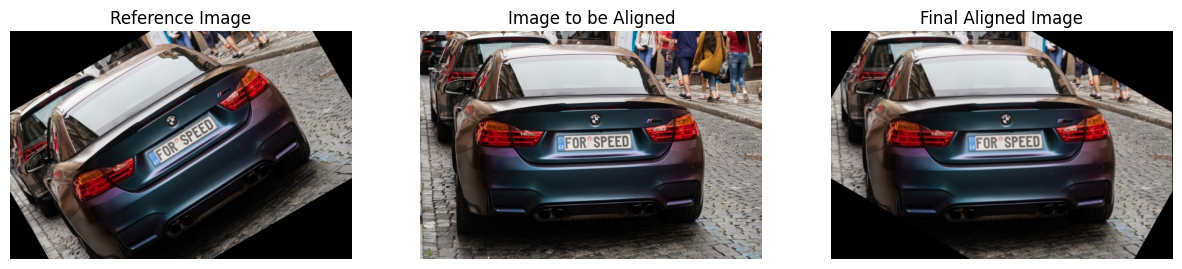

In [148]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img2_rgb)
plt.title("Reference Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img1_rgb)
plt.title("Image to be Aligned")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_aligned_rgb)
plt.title("Final Aligned Image")
plt.axis("off")

plt.show()


### Custom face image


###  Import libraries

In [165]:
img1 = cv2.imread("tavish2.jpeg")
img2 = cv2.imread("tavish1.jpeg")

In [166]:
img1_g = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_g = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

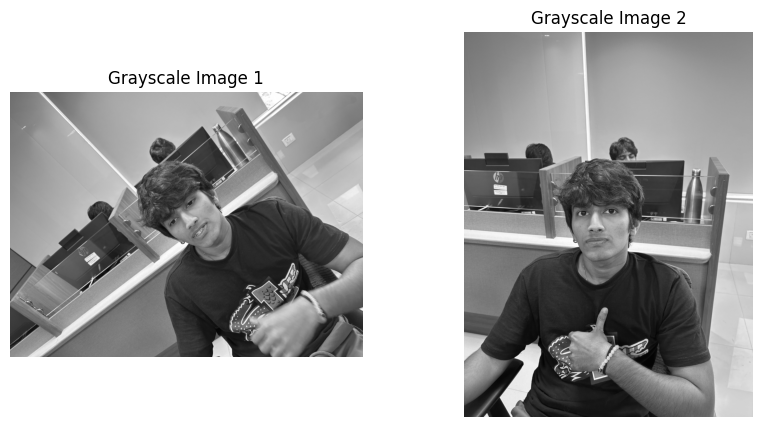

In [167]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1_g, cmap="gray")
plt.title("Grayscale Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_g, cmap="gray")
plt.title("Grayscale Image 2")
plt.axis("off")

plt.show()


In [168]:
orb = cv2.ORB_create(nfeatures=500)
k1, d1 = orb.detectAndCompute(img1_g, None)
k2, d2 = orb.detectAndCompute(img2_g, None)

In [169]:
ln = len(k1)
ln

500

In [170]:
len(d1[0])

32

In [171]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [172]:
matches = matcher.match(d1, d2)

In [173]:
if len(matches) == 0:
    print("No matches found!")
    exit()

In [174]:
matches = sorted(matches, key=lambda x: x.distance)
ln = min(len(matches), len(k1), len(k2))

In [175]:
kp1_locations = np.zeros((ln, 2))
kp2_locations = np.zeros((ln, 2))

In [176]:
for i in range(ln):
    kp1_locations[i, :] = k1[matches[i].queryIdx].pt
    kp2_locations[i, :] = k2[matches[i].trainIdx].pt


In [177]:
h,mask = cv2.findHomography(kp1_locations, kp2_locations, cv2.RANSAC, 5.0)

In [178]:
img_aligned = cv2.warpPerspective(img1, h, (img2.shape[1], img2.shape[0]))

In [179]:
img1_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_aligned_rgb = cv2.cvtColor(img_aligned, cv2.COLOR_BGR2RGB)

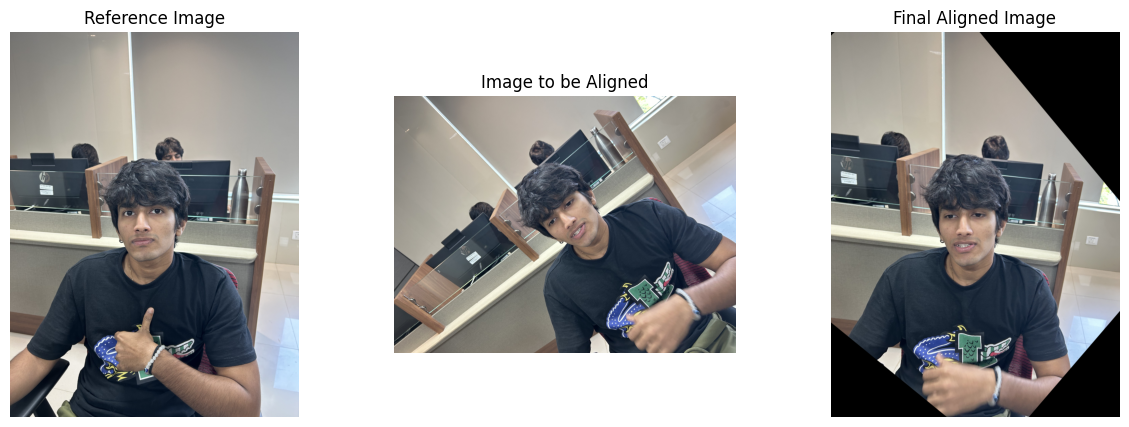

In [181]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img1_rgb)
plt.title("Reference Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2_rgb)
plt.title("Image to be Aligned")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_aligned_rgb)
plt.title("Final Aligned Image")
plt.axis("off")

plt.show()


# **Conclusion**:
 
*   ORB Detector is used to detect the location of the key point and their corresponding descriptor
*   500 key points are used to match the corresppoding location of the key points of the reference and tilted image
*   Based on the location of the matching key points homography matrix is determined which is used to warp the tilted image to align with the refernce image
*   The above technique will apply on the given image of the car and the output image shows aligned image
*   The same technique is applied on own image an it shows even if the image is tilted and rotated, the aligned image is similar to reference image.
 